In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import csv

import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import stem
stemmer = stem.PorterStemmer()
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)
from collections import Counter
import datetime
import string
punct = list(string.punctuation)
import requests
import praw
!pip install PRAW


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stops and token not in punct]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [43]:
#TRUMP TWEETS: Total 56, 571.

In [47]:
Trump_data = pd.read_csv('TrumpTweets.csv')

In [50]:
Trump_data['processed_text'] = Trump_data['text'].apply(preprocess_text)

In [51]:
Trump_data

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,processed_text
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,"[republican, democrat, created, economic, prob..."
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,"[thrilled, back, great, city, charlotte, north..."
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,"[rt, cbs_herridge, read, letter, surveillance,..."
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,"[unsolicited, mail, ballot, scam, major, threa..."
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,"[rt, mzhemingway, friendly, telling, event, co..."
...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[rt, randpaul, ’, know, joebiden, think, conti..."
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[rt, elisestefanik, president, realdonaldtrump..."
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,"[rt, teamtrump, live, presidential, debate, de..."
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,"[signed, order, support, worker, delphi, corpo..."


In [6]:
#BIDEN TWEETS: Total 7,481. 

In [29]:
Biden_data = pd.read_csv('JoeBidenTweets.csv')
Biden_data.rename({'content': 'text', 'retweetCount': 'retweets'}, axis=1, inplace=True)

In [52]:
Biden_data['processed_text'] = Biden_data['text'].apply(preprocess_text)

In [53]:
Biden_data

,text,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweets,retweetedTweet,url,id,conversationId,processed_text
0,Representatives of the people took a vote on t...,Sat Dec 17 22:35:00 +0000 2022,2022-12-17 22:35:00+00:00,20269,NaN,[],329,NaN,6144,2245,NaN,https://twitter.com/JoeBiden/status/1604243794...,1604243794643255297,1604243794643255297,"[representative, people, took, vote, floor, un..."
1,"Thanks to the Inflation Reduction Act, out-of-...",Sat Dec 17 19:28:00 +0000 2022,2022-12-17 19:28:00+00:00,12637,NaN,[],152,NaN,2960,1521,NaN,https://twitter.com/JoeBiden/status/1604196734...,1604196734728544261,1604196734728544261,"[thanks, inflation, reduction, act, out-of-poc..."
2,When hospitals and community centers are threa...,Sat Dec 17 16:08:01 +0000 2022,2022-12-17 16:08:01+00:00,34776,NaN,[],1027,NaN,13268,4277,NaN,https://twitter.com/JoeBiden/status/1604146404...,1604146404359815170,1604146404359815170,"[hospital, community, center, threatened, inti..."
3,The American people won.\nBig Pharma lost.\n\n...,Fri Dec 16 15:30:04 +0000 2022,2022-12-16 15:30:04+00:00,48489,NaN,[],1143,NaN,11240,5929,NaN,https://twitter.com/JoeBiden/status/1603774469...,1603774469704716288,1603774469704716288,"[american, people, big, pharma, lost, medicare..."
4,We are making the largest investment ever in c...,Fri Dec 16 00:47:00 +0000 2022,2022-12-16 00:47:00+00:00,13955,NaN,[],550,NaN,8958,1869,NaN,https://twitter.com/JoeBiden/status/1603552237...,1603552237036490757,1603552237036490757,"[making, largest, investment, ever, combating,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,News for you this morning: VP Biden will speak...,Mon Apr 09 13:11:05 +0000 2012,2012-04-09 13:11:05+00:00,15,NaN,[],2,NaN,52,50,NaN,https://twitter.com/JoeBiden/status/1893396506...,189339650610036736,189339650610036736,"[news, morning, vp, biden, speak, exeter, nh, ..."
7477,Campaign staff will run this account to keep y...,Mon Apr 09 09:43:15 +0000 2012,2012-04-09 09:43:15+00:00,44,NaN,[],68,NaN,281,58,NaN,https://twitter.com/JoeBiden/status/1892873500...,189287350034104320,189287350034104320,"[campaign, staff, run, account, keep, date, vp..."
7478,We're excited to announce that @JoeBiden is be...,Mon Apr 09 09:42:46 +0000 2012,2012-04-09 09:42:46+00:00,24,NaN,[],14,NaN,25,75,NaN,https://twitter.com/JoeBiden/status/1892872273...,189287227321356289,189287227321356289,"['re, excited, announce, joebiden, rebooted, 2..."
7479,"Iowans, there's a good chance there's a Biden ...",Sat Dec 29 15:35:26 +0000 2007,2007-12-29 15:35:26+00:00,117,NaN,[],116,NaN,127,38,NaN,https://twitter.com/JoeBiden/status/543984392,543984392,543984392,"[iowan, 's, good, chance, 's, biden, near, tod..."


In [10]:
#ATTEMPT AT USING MANIFESTOS API.  

In [ ]:
#Either this API doesn't give proper access to the csv data files I know they have on their website...
#...or I haven't been able to figure out the correct request details - either way it's higly specific and hard to use. 
# If I were able to find links to each individual manifesto csv within the api, 
# I could have extracted it by adapting the code used in class below. 

In [34]:
#example api on their website that I haven't been able to figure out
project = "https://manifesto-project.wzb.eu/api/v1/metadata?api_key=0c96e04e00b1532952f82fc10c798f4d&keys[]=41320_200909&keys[]=41320_200509&version=2015-3"
rg = requests.get(url = project)
rg = rg.json()
rg

{'items': [{'party_id': 41320,
   'election_date': '200909',
   'language': 'german',
   'has_eu_code': 'TRUE',
   'is_primary_doc': 'TRUE',
   'may_contradict_core_dataset': 'FALSE',
   'manifesto_id': '41320_2009',
   'md5sum_text': '5c5d2f9e1959c23a4ec583a8815785c4',
   'url_original': '/down/originals/41320_2009.pdf',
   'md5sum_original': 'CURRENTLY_UNAVAILABLE',
   'annotations': True},
  {'party_id': 41320,
   'election_date': '200509',
   'language': 'german',
   'has_eu_code': 'FALSE',
   'is_primary_doc': 'TRUE',
   'may_contradict_core_dataset': 'TRUE',
   'manifesto_id': '41320_2005',
   'md5sum_text': '38de71efca79788d6784aaf959bccaea',
   'url_original': '/down/originals/41320_2005.pdf',
   'md5sum_original': 'CURRENTLY_UNAVAILABLE',
   'annotations': True}],
 'missing_items': []}

In [35]:
#the code from class I think I could adapt to find specific manifestos after creating a json of all 
#manifestos under set ideologies

manifestos = []

links = []

for i in range(len(rg['results'])):
    try:
        links.append(rg['results'][i]['formats']['text/plain'])
        manifestos.append(rg['results'][i]['title'])
    except:
        pass


texts = []

for i in links:
    response = requests.get(i)
    texts.append(response.text)
    

SyntaxError: '(' was never closed (1175548466.py, line 8)

In [ ]:
#Here's another try and still not working. Looks like I'm missing some parameters but this doesn't seem easy to do. 

In [126]:
url = 'https://manifesto-project.wzb.eu/api/v1/get_core?'

#I know the below information is true from one of the csv files I've downloaded manually.
#I'd like to create a json file using party_id to begin with then "parfarms" listed on their online tool i.e. 
#ideolgy like "social democratic parties"

api_key = "0c96e04e00b1532952f82fc10c798f4d"
party_id = '41320'
election_date = "200505"  
language = "english"

params = {
    "api_key": api_key,
    "party_id": party_id,
    "language": language }

rg = requests.get(url, params = params)
rg = rg.json()
rg


{'error': 'Missing required parameters'}

In [ ]:
#EXAMPLE OF HOW I'D APPLY DATA CLEANING & ORGANISATION TO A MANIFESTO. 
#Below are csv files I've downloaded from the manifesto project.

In [88]:
with open('Conservative_Party_2005.csv', 'r') as f:
    CP05UK_text = f.read()
    
CP05UK_text = CP05UK_text.encode('ascii', 'ignore')
CP05UK_text = CP05UK_text.decode()

CP05UK_text_no_punct = ''
for i in CP05UK_text:
    if i not in punct:
        CP05UK_text_no_punct += i

CP05UK_text_lower = CP05UK_text_no_punct.lower()

CP05UK_words = word_tokenize(CP05UK_text_lower)
CP05UK_lemmas = [lemmatizer.lemmatize(i) for i in CP05UK_words]
CP05UK_lemmas = [i for i in CP05UK_lemmas if i not in stops]

In [89]:
counts_CP05 = pd.Series(Counter(CP05UK_lemmas))

In [90]:
counts_CP05.sort_values(ascending=False)

government      58
people          48
conservative    41
britain         37
school          35
                ..
replace          1
follows          1
apply            1
super            1
actionnana       1
Length: 1542, dtype: int64

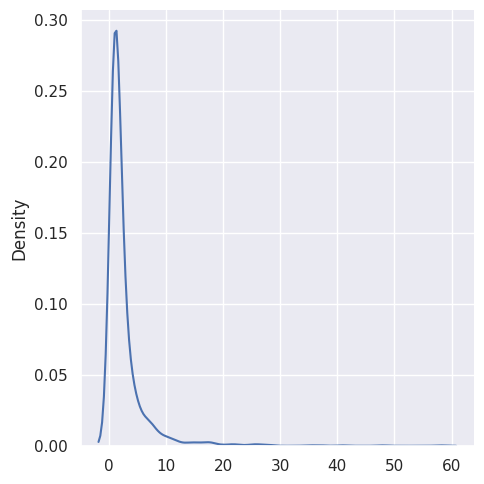

In [91]:
sns.displot(counts_CP05, kind = 'kde')
plt.show()

<Axes: >

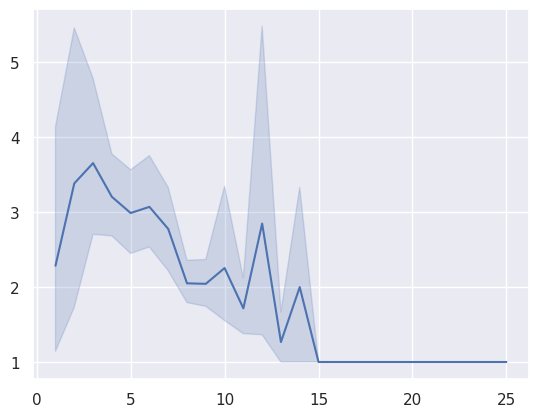

In [94]:
sns.lineplot(x = [len(i) for i in counts_CP05.index], y = [i for i in counts_CP05.values])

In [86]:
#Saving edited version as a new file
with open('CP05UK_lemmas.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(CP05UK_lemmas)

In [106]:
#EXAMPLE OF HOW I'D APPLY DATA CLEANING & ORGANISATION TO ANOTHER MANIFESTO TO COMPARE THE FIRST ONE TO

In [71]:
with open('Labour_Party_2005.csv', 'r') as f:
    LP05UK_text = f.read()
    
LP05UK_text = LP05UK_text.encode('ascii', 'ignore')
LP05UK_text = LP05UK_text.decode()

LP05UK_text_no_punct = ''
for i in LP05UK_text:
    if i not in punct:
        LP05UK_text_no_punct += i
        
LP05UK_text_lower = LP05UK_text_no_punct.lower()

LP05UK_words = word_tokenize(LP05UK_text_lower)
LP05UK_lemmas = [lemmatizer.lemmatize(i) for i in LP05UK_words]
LP05UK_lemmas = [i for i in LP05UK_lemmas if i not in stops]

In [73]:
counts_LP05 = pd.Series(Counter(LP05UK_lemmas))

In [75]:
counts_LP05.sort_values(ascending=False)

new                 148
people              120
school              110
service              95
support              83
                   ... 
acquitted             1
unjustly              1
jeopardy              1
heinous               1
institutionsnana      1
Length: 3010, dtype: int64

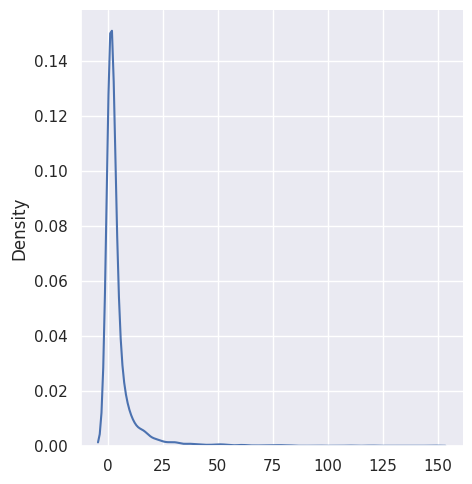

In [77]:
sns.displot(counts_LP05, kind = 'kde')
plt.show()

<Axes: >

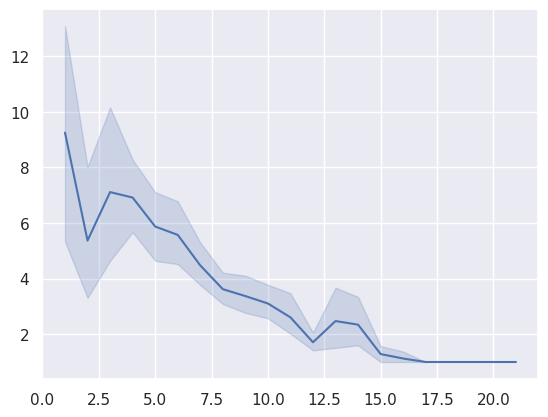

In [95]:
sns.lineplot(x = [len(i) for i in counts_LP05.index], y = [i for i in counts_LP05.values])

In [79]:
#Saving edited version as a new file
with open('LP05UK_lemmas.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(LP05UK_lemmas)

In [ ]:
#Attempt at Reddit API

In [60]:
reddit = praw.Reddit(user_agent='NLP',
                     client_id='ZUiDiU8bwXRwKoA4zFUtHQ', client_secret="wo9DhLMdd48qAe73Q7vgJyQNrLkbTw",
                     username='SmartBench7', password='NLP-Project')

In [ ]:
submission_id = 

In [96]:
def submission(submission_id): 
    try:
        submission = reddit.submission(url = submission_id)
    except:
        submission = reddit.submission(submission_id)
    title = submission.title
    submission.comments.replace_more()
    text = [i.body for i in submission.comments]
    score = [i.score for i in submission.comments]
    user = [i.author for i in submission.comments]
    date = [datetime.datetime.fromtimestamp(i.created) for i in submission.comments]
    df = pd.DataFrame()
    df['text'] = text
    df['datetime'] = date
    df['score'] = score
    df['subreddit'] = submission.subreddit
    df['redditor'] = user
    df['type'] = 'comment'
    df['title'] = title
    df = df.sort_values('score', ascending = False).reset_index(drop = True)
    return df

df = submission('https://www.reddit.com/r/ukpolitics/comments/11i0c6t/insulate_britain_protesters_jailed_for_seven/')

In [97]:
df = submission('https://www.reddit.com/r/ukpolitics/comments/11i0c6t/insulate_britain_protesters_jailed_for_seven/')

In [98]:
df

,text,datetime,score,subreddit,redditor,type,title
0,I'm really not all that comfortable with a jud...,2023-03-04 14:47:56,896,ukpolitics,squigs,comment,Insulate Britain protesters jailed for seven w...
1,But it's an undeniable *fact* that these prote...,2023-03-04 16:20:27,114,ukpolitics,GordonS333,comment,Insulate Britain protesters jailed for seven w...
2,Seems they effectively wanted to create a situ...,2023-03-04 15:26:01,89,ukpolitics,Ewannnn,comment,Insulate Britain protesters jailed for seven w...
3,The lesson here is that shouldn't represent yo...,2023-03-04 15:02:36,52,ukpolitics,Cs_A1t,comment,Insulate Britain protesters jailed for seven w...
4,This looks very much like an attempt by the ju...,2023-03-04 17:42:01,20,ukpolitics,sensitivePornGuy,comment,Insulate Britain protesters jailed for seven w...
5,Let’s be clear. They pleaded not guilty. Went ...,2023-03-05 02:01:39,16,ukpolitics,Craig_52,comment,Insulate Britain protesters jailed for seven w...
6,I'd be willing to bet that the Judge was conce...,2023-03-04 18:14:35,7,ukpolitics,BotlikeBehaviour,comment,Insulate Britain protesters jailed for seven w...
7,"Not sure about the specifics of court cases, b...",2023-03-04 17:37:43,5,ukpolitics,regretfullyjafar,comment,Insulate Britain protesters jailed for seven w...
8,"I might be way off the mark, and acknowledge I...",2023-03-04 17:01:28,2,ukpolitics,TwoInchTickler,comment,Insulate Britain protesters jailed for seven w...
9,Snapshot of _Insulate Britain protesters jaile...,2023-03-04 14:23:45,1,ukpolitics,AutoModerator,comment,Insulate Britain protesters jailed for seven w...


In [99]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [100]:
df

,text,datetime,score,subreddit,redditor,type,title,processed_text
0,I'm really not all that comfortable with a jud...,2023-03-04 14:47:56,896,ukpolitics,squigs,comment,Insulate Britain protesters jailed for seven w...,"['m, really, comfortable, judge, able, bar, ce..."
1,But it's an undeniable *fact* that these prote...,2023-03-04 16:20:27,114,ukpolitics,GordonS333,comment,Insulate Britain protesters jailed for seven w...,"['s, undeniable, fact, protester, climate, cha..."
2,Seems they effectively wanted to create a situ...,2023-03-04 15:26:01,89,ukpolitics,Ewannnn,comment,Insulate Britain protesters jailed for seven w...,"[seems, effectively, wanted, create, situation..."
3,The lesson here is that shouldn't represent yo...,2023-03-04 15:02:36,52,ukpolitics,Cs_A1t,comment,Insulate Britain protesters jailed for seven w...,"[lesson, n't, represent, court, 's, reason, la..."
4,This looks very much like an attempt by the ju...,2023-03-04 17:42:01,20,ukpolitics,sensitivePornGuy,comment,Insulate Britain protesters jailed for seven w...,"[look, much, like, attempt, judge, circumvent,..."
5,Let’s be clear. They pleaded not guilty. Went ...,2023-03-05 02:01:39,16,ukpolitics,Craig_52,comment,Insulate Britain protesters jailed for seven w...,"[let, ’, clear, pleaded, guilty, went, court, ..."
6,I'd be willing to bet that the Judge was conce...,2023-03-04 18:14:35,7,ukpolitics,BotlikeBehaviour,comment,Insulate Britain protesters jailed for seven w...,"['d, willing, bet, judge, concerned, jury, nul..."
7,"Not sure about the specifics of court cases, b...",2023-03-04 17:37:43,5,ukpolitics,regretfullyjafar,comment,Insulate Britain protesters jailed for seven w...,"[sure, specific, court, case, surely, jury, wo..."
8,"I might be way off the mark, and acknowledge I...",2023-03-04 17:01:28,2,ukpolitics,TwoInchTickler,comment,Insulate Britain protesters jailed for seven w...,"[might, way, mark, acknowledge, ’, know, in, o..."
9,Snapshot of _Insulate Britain protesters jaile...,2023-03-04 14:23:45,1,ukpolitics,AutoModerator,comment,Insulate Britain protesters jailed for seven w...,"[snapshot, _insulate, britain, protester, jail..."
